# Group C Machine Learning COMP09012 Assignment 2021

Ronan Mc Cormack & Richard O Riordan

# Import the libraries 

In [293]:
## Importing the required libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import os 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import itertools

# Import the Data

In [294]:
## Importing the data into separate dataframes
df_peugeot_1 = pd.read_csv('peugeot_207_01.csv',sep=";",index_col=0)
df_peugeot_2 = pd.read_csv('peugeot_207_02.csv',sep=";",index_col=0)
df_corsa_1 = pd.read_csv('opel_corsa_01.csv',sep=";",index_col=0)
df_corsa_2 = pd.read_csv('opel_corsa_02.csv',sep=";",index_col=0)

In [295]:
## Checking the rows & columns of the data
print(df_peugeot_1.shape)
print(df_peugeot_2.shape)
print(df_corsa_1.shape)
print(df_corsa_2.shape)

(8199, 17)
(4446, 17)
(7038, 17)
(4092, 17)


# Data Preprocessing

In [296]:
## Concatenating the data sets corresponding to each vehicle
df_peugeot = pd.concat([df_peugeot_1,df_peugeot_2])
df_corsa = pd.concat([df_corsa_1,df_corsa_2])

In [297]:
## Checking for NaNs
df_peugeot.isna().sum()

AltitudeVariation            0
VehicleSpeedInstantaneous    9
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   5
EngineCoolantTemperature     5
ManifoldAbsolutePressure     5
EngineRPM                    5
MassAirFlow                  5
IntakeAirTemperature         5
VerticalAcceleration         0
FuelConsumptionAverage       5
roadSurface                  0
traffic                      0
drivingStyle                 0
dtype: int64

In [298]:
## Checking for NaNs
df_corsa.isna().sum()

AltitudeVariation            0
VehicleSpeedInstantaneous    0
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow                  0
IntakeAirTemperature         0
VerticalAcceleration         0
FuelConsumptionAverage       0
roadSurface                  0
traffic                      0
drivingStyle                 0
dtype: int64

In [299]:
## Dropping the NaN values
df_peugeot = df_peugeot.dropna()
df_corsa = df_corsa.dropna()

## Resetting the index
df_peugeot = df_peugeot.reset_index(drop=True)
df_corsa = df_corsa.reset_index(drop=True)

In [300]:
df_peugeot.head()

AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
0         -13.399994                  20.699999                6.060   
1         -13.200005                  17.100000                6.345   
2         -13.200005                  14.400000                6.585   
3         -11.800003                  14.400000                6.825   
4         -19.800003                  14.400000                7.065   

   VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
0            115.840061              -4.500000                    1.0548   
1            117.200816              -3.599998                    0.9012   
2            117.559595              -2.700001                    0.9331   
3            117.801222               0.000000                    0.9878   
4            117.925697               0.000000                    1.1316   

   EngineLoad  EngineCoolantTemperature  ManifoldAbsolutePressure  EngineRPM  \
0   38.039215                      31.0                     101.0      798.0   
1   38.039215                      31.0                     101.0      797.5   
2   90.588234                      32.0                     101.0      797.5   
3   90.588234                      32.0                     101.0      726.0   
4   92.941177                      32.0                     101.0      784.0   

   MassAirFlow  IntakeAirTemperature  VerticalAcceleration  \
0         6.22                  15.0               -0.5982   
1         6.27                  15.0               -0.5244   
2         6.27                  15.0               -0.5068   
3         8.63                  15.0               -0.4882   
4         8.88                  15.0               -0.6712   

   FuelConsumptionAverage      roadSurface                 traffic  \
0               27.919697  SmoothCondition  LowCongestionCondition   
1               26.458355  SmoothCondition  LowCongestionCondition   
2               26.458355  SmoothCondition  LowCongestionCondition   
3               26.004126  SmoothCondition  LowCongestionCondition   
4               25.295498  SmoothCondition  LowCongestionCondition   

    drivingStyle  
0  EvenPaceStyle  
1  EvenPaceStyle  
2  EvenPaceStyle  
3  EvenPaceStyle  
4  EvenPaceStyle

In [301]:
df_corsa.head()

AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
0          -2.299988                  25.670519            13.223501   
1          -2.099976                  24.094259            13.638919   
2          -1.500000                  22.743179            14.031043   
3           0.100037                  22.292820            14.171073   
4           0.099976                  23.643900            14.328954   

   VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
0            121.592690              -2.476980                    0.3555   
1            120.422571              -1.576260                    0.4492   
2            118.456769              -1.351080                    0.4258   
3            117.571308              -0.450359                    0.4140   
4            117.074149               1.351080                    0.3945   

   EngineLoad  EngineCoolantTemperature  ManifoldAbsolutePressure  EngineRPM  \
0    4.705883                        68                       106       1796   
1   10.588236                        68                       103       1689   
2   27.450981                        68                       103       1599   
3   24.313726                        69                       104       1620   
4   20.000000                        69                       104       1708   

   MassAirFlow  IntakeAirTemperature  VerticalAcceleration  \
0        15.81                    24               -0.1133   
1        14.65                    22               -0.1289   
2        11.85                    21               -0.1328   
3        12.21                    20               -0.0859   
4        11.91                    21               -0.0664   

   FuelConsumptionAverage      roadSurface                 traffic  \
0               19.497335  SmoothCondition  LowCongestionCondition   
1               19.515722  SmoothCondition  LowCongestionCondition   
2               19.441765  SmoothCondition  LowCongestionCondition   
3               19.388769  SmoothCondition  LowCongestionCondition   
4               19.301638  SmoothCondition  LowCongestionCondition   

    drivingStyle  
0  EvenPaceStyle  
1  EvenPaceStyle  
2  EvenPaceStyle  
3  EvenPaceStyle  
4  EvenPaceStyle

## Splitting the Data

In [302]:
## Declating the y values or matrix in this case 
peugeot_y = df_peugeot.select_dtypes(object)
corsa_y = df_corsa.select_dtypes(object)

## Dropping non-numerical data from the main dataset
df_peugeot = df_peugeot.drop(columns=df_peugeot.select_dtypes(object))
df_corsa = df_corsa.drop(columns=df_corsa.select_dtypes(object))

## Declaring the dataset columns 
X_cols_peugeot = df_peugeot.columns
X_cols_corsa = df_corsa.columns

In [303]:
df_peugeot.head()

AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
0         -13.399994                  20.699999                6.060   
1         -13.200005                  17.100000                6.345   
2         -13.200005                  14.400000                6.585   
3         -11.800003                  14.400000                6.825   
4         -19.800003                  14.400000                7.065   

   VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
0            115.840061              -4.500000                    1.0548   
1            117.200816              -3.599998                    0.9012   
2            117.559595              -2.700001                    0.9331   
3            117.801222               0.000000                    0.9878   
4            117.925697               0.000000                    1.1316   

   EngineLoad  EngineCoolantTemperature  ManifoldAbsolutePressure  EngineRPM  \
0   38.039215                      31.0                     101.0      798.0   
1   38.039215                      31.0                     101.0      797.5   
2   90.588234                      32.0                     101.0      797.5   
3   90.588234                      32.0                     101.0      726.0   
4   92.941177                      32.0                     101.0      784.0   

   MassAirFlow  IntakeAirTemperature  VerticalAcceleration  \
0         6.22                  15.0               -0.5982   
1         6.27                  15.0               -0.5244   
2         6.27                  15.0               -0.5068   
3         8.63                  15.0               -0.4882   
4         8.88                  15.0               -0.6712   

   FuelConsumptionAverage  
0               27.919697  
1               26.458355  
2               26.458355  
3               26.004126  
4               25.295498

In [304]:
df_corsa.head()

AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
0          -2.299988                  25.670519            13.223501   
1          -2.099976                  24.094259            13.638919   
2          -1.500000                  22.743179            14.031043   
3           0.100037                  22.292820            14.171073   
4           0.099976                  23.643900            14.328954   

   VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
0            121.592690              -2.476980                    0.3555   
1            120.422571              -1.576260                    0.4492   
2            118.456769              -1.351080                    0.4258   
3            117.571308              -0.450359                    0.4140   
4            117.074149               1.351080                    0.3945   

   EngineLoad  EngineCoolantTemperature  ManifoldAbsolutePressure  EngineRPM  \
0    4.705883                        68                       106       1796   
1   10.588236                        68                       103       1689   
2   27.450981                        68                       103       1599   
3   24.313726                        69                       104       1620   
4   20.000000                        69                       104       1708   

   MassAirFlow  IntakeAirTemperature  VerticalAcceleration  \
0        15.81                    24               -0.1133   
1        14.65                    22               -0.1289   
2        11.85                    21               -0.1328   
3        12.21                    20               -0.0859   
4        11.91                    21               -0.0664   

   FuelConsumptionAverage  
0               19.497335  
1               19.515722  
2               19.441765  
3               19.388769  
4               19.301638

## Checking columns match the assignment

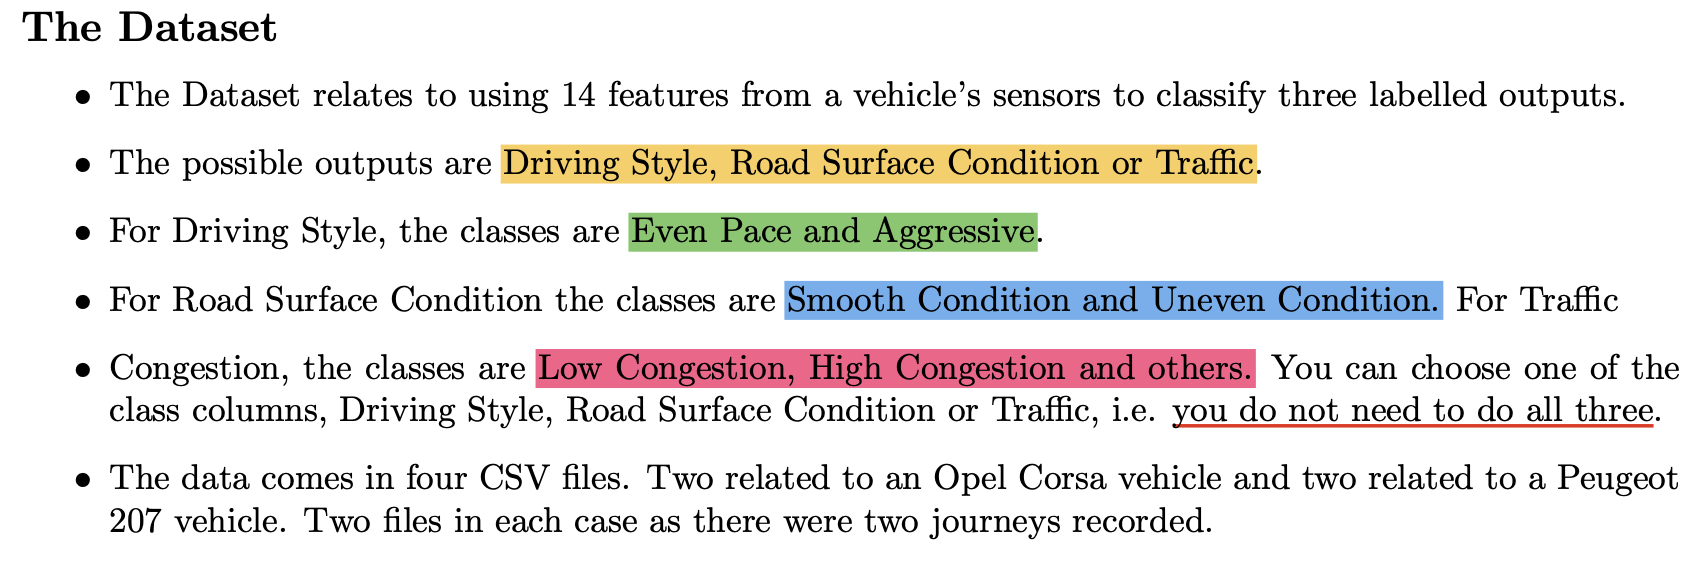

In [305]:
## Checking the Peoguet outputs for errors
for x in peugeot_y.columns:
    print(peugeot_y[x].value_counts())

UnevenCondition         5835
SmoothCondition         3550
FullOfHolesCondition    3247
Name: roadSurface, dtype: int64
LowCongestionCondition       7705
HighCongestionCondition      2470
NormalCongestionCondition    2457
Name: traffic, dtype: int64
EvenPaceStyle      11962
AggressiveStyle      670
Name: drivingStyle, dtype: int64


In [306]:
## Correcting the error by merging the error rows to the correct matching row
peugeot_y['roadSurface'][peugeot_y['roadSurface']=='FullOfHolesCondition']=peugeot_y['roadSurface'][peugeot_y['roadSurface']=='FullOfHolesCondition'].map({'FullOfHolesCondition':'UnevenCondition'})

In [307]:
## Verifying this worked
for x in peugeot_y.columns:
    print(peugeot_y[x].value_counts())

UnevenCondition    9082
SmoothCondition    3550
Name: roadSurface, dtype: int64
LowCongestionCondition       7705
HighCongestionCondition      2470
NormalCongestionCondition    2457
Name: traffic, dtype: int64
EvenPaceStyle      11962
AggressiveStyle      670
Name: drivingStyle, dtype: int64


In [308]:
## Checking the Corsa outputs for errors
for x in corsa_y.columns:
    print(corsa_y[x].value_counts())

SmoothCondition    10685
UnevenCondition      445
Name: roadSurface, dtype: int64
LowCongestionCondition       10052
HighCongestionCondition        545
NormalCongestionCondition      533
Name: traffic, dtype: int64
EvenPaceStyle      9041
AggressiveStyle    2089
Name: drivingStyle, dtype: int64


## Data Labelling 

In [309]:
## Declaring the data label encoder function
def label_encode(df,col):    
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    le.fit(df[col])
    df[col] =le.transform(df[col])

In [310]:
## Applying the label encoder to all columns in the Peugeot outputs
for x in peugeot_y.columns:
    label_encode(peugeot_y,x)
    print(peugeot_y[x].value_counts())

1    9082
0    3550
Name: roadSurface, dtype: int64
1    7705
0    2470
2    2457
Name: traffic, dtype: int64
1    11962
0      670
Name: drivingStyle, dtype: int64


In [311]:
## Applying the label encoder to all columns in the Corsa outputs
for x in corsa_y.columns:
    label_encode(corsa_y,x)
    print(corsa_y[x].value_counts())

0    10685
1      445
Name: roadSurface, dtype: int64
1    10052
0      545
2      533
Name: traffic, dtype: int64
1    9041
0    2089
Name: drivingStyle, dtype: int64


## Data Scalling 

In [312]:
## Declaring the Min-Max Scaler function
def minmax_scale(df,cols):
    from sklearn.preprocessing import MinMaxScaler
    df_scale = MinMaxScaler().fit_transform(df)
    df_scale = pd.DataFrame(df_scale,columns=cols)
    return df_scale

In [313]:
## Declaring the Standard Scaler function
def standard_scale(df,cols):
    from sklearn.preprocessing import StandardScaler
    df_scale = StandardScaler().fit_transform(df)
    df_scale = pd.DataFrame(df_scale,columns=cols)
    return df_scale

In [314]:
## Applying each scaler to the Peugeot dataset and saving the outcome to a different variable
df_peugeot_minmax = minmax_scale(df_peugeot,X_cols_peugeot)
df_peugeot_std = standard_scale(df_peugeot,X_cols_peugeot)

In [315]:
## Applying each scaler to the Corsa dataset and saving the outcome to a different variable
df_corsa_minmax = minmax_scale(df_corsa,X_cols_corsa)
df_corsa_std = standard_scale(df_corsa,X_cols_corsa)

In [316]:
df_peugeot.head()

AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
0         -13.399994                  20.699999                6.060   
1         -13.200005                  17.100000                6.345   
2         -13.200005                  14.400000                6.585   
3         -11.800003                  14.400000                6.825   
4         -19.800003                  14.400000                7.065   

   VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
0            115.840061              -4.500000                    1.0548   
1            117.200816              -3.599998                    0.9012   
2            117.559595              -2.700001                    0.9331   
3            117.801222               0.000000                    0.9878   
4            117.925697               0.000000                    1.1316   

   EngineLoad  EngineCoolantTemperature  ManifoldAbsolutePressure  EngineRPM  \
0   38.039215                      31.0                     101.0      798.0   
1   38.039215                      31.0                     101.0      797.5   
2   90.588234                      32.0                     101.0      797.5   
3   90.588234                      32.0                     101.0      726.0   
4   92.941177                      32.0                     101.0      784.0   

   MassAirFlow  IntakeAirTemperature  VerticalAcceleration  \
0         6.22                  15.0               -0.5982   
1         6.27                  15.0               -0.5244   
2         6.27                  15.0               -0.5068   
3         8.63                  15.0               -0.4882   
4         8.88                  15.0               -0.6712   

   FuelConsumptionAverage  
0               27.919697  
1               26.458355  
2               26.458355  
3               26.004126  
4               25.295498

In [317]:
df_peugeot_minmax.head()

AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
0           0.311111                   0.172932             0.052748   
1           0.316667                   0.142857             0.055229   
2           0.316667                   0.120301             0.057318   
3           0.355556                   0.120301             0.059407   
4           0.133333                   0.120301             0.061496   

   VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
0              0.081671               0.117188                  0.584800   
1              0.082631               0.125000                  0.562997   
2              0.082884               0.132813                  0.567525   
3              0.083054               0.156250                  0.575290   
4              0.083142               0.156250                  0.595702   

   EngineLoad  EngineCoolantTemperature  ManifoldAbsolutePressure  EngineRPM  \
0    0.380392                  0.256757                  0.158537   0.284746   
1    0.380392                  0.256757                  0.158537   0.284567   
2    0.905882                  0.270270                  0.158537   0.284567   
3    0.905882                  0.270270                  0.158537   0.259054   
4    0.929412                  0.270270                  0.158537   0.279750   

   MassAirFlow  IntakeAirTemperature  VerticalAcceleration  \
0     0.141757              0.122807              0.507644   
1     0.143085              0.122807              0.524950   
2     0.143085              0.122807              0.529077   
3     0.205734              0.122807              0.533438   
4     0.212371              0.122807              0.490527   

   FuelConsumptionAverage  
0                0.879400  
1                0.815376  
2                0.815376  
3                0.795475  
4                0.764429

In [318]:
df_peugeot_std.head()

AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
0          -6.281900                  -0.534542            -1.062697   
1          -6.187627                  -0.643729            -1.053357   
2          -6.187627                  -0.725619            -1.045492   
3          -5.527679                  -0.725619            -1.037626   
4          -9.298806                  -0.725619            -1.029761   

   VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
0             -0.211181              -1.863633                  0.383174   
1             -0.203235              -1.490329                  0.224912   
2             -0.201140              -1.117025                  0.257780   
3             -0.199729               0.002887                  0.314140   
4             -0.199002               0.002887                  0.462305   

   EngineLoad  EngineCoolantTemperature  ManifoldAbsolutePressure  EngineRPM  \
0   -0.178623                 -1.935200                 -0.758497  -1.026118   
1   -0.178623                 -1.935200                 -0.758497  -1.026990   
2    1.632103                 -1.879973                 -0.758497  -1.026990   
3    1.632103                 -1.879973                 -0.758497  -1.151710   
4    1.713180                 -1.879973                 -0.758497  -1.050539   

   MassAirFlow  IntakeAirTemperature  VerticalAcceleration  \
0    -1.025041             -1.213904             -0.188919   
1    -1.019231             -1.213904             -0.076754   
2    -1.019231             -1.213904             -0.050004   
3    -0.745020             -1.213904             -0.021735   
4    -0.715972             -1.213904             -0.299869   

   FuelConsumptionAverage  
0                3.454913  
1                3.084356  
2                3.084356  
3                2.969176  
4                2.789487

In [319]:
df_corsa.head()

AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
0          -2.299988                  25.670519            13.223501   
1          -2.099976                  24.094259            13.638919   
2          -1.500000                  22.743179            14.031043   
3           0.100037                  22.292820            14.171073   
4           0.099976                  23.643900            14.328954   

   VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
0            121.592690              -2.476980                    0.3555   
1            120.422571              -1.576260                    0.4492   
2            118.456769              -1.351080                    0.4258   
3            117.571308              -0.450359                    0.4140   
4            117.074149               1.351080                    0.3945   

   EngineLoad  EngineCoolantTemperature  ManifoldAbsolutePressure  EngineRPM  \
0    4.705883                        68                       106       1796   
1   10.588236                        68                       103       1689   
2   27.450981                        68                       103       1599   
3   24.313726                        69                       104       1620   
4   20.000000                        69                       104       1708   

   MassAirFlow  IntakeAirTemperature  VerticalAcceleration  \
0        15.81                    24               -0.1133   
1        14.65                    22               -0.1289   
2        11.85                    21               -0.1328   
3        12.21                    20               -0.0859   
4        11.91                    21               -0.0664   

   FuelConsumptionAverage  
0               19.497335  
1               19.515722  
2               19.441765  
3               19.388769  
4               19.301638

In [320]:
df_corsa_minmax.head()

AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
0           0.346734                   0.205776             0.108987   
1           0.356785                   0.193141             0.112411   
2           0.386935                   0.182310             0.115643   
3           0.467339                   0.178700             0.116797   
4           0.467335                   0.189531             0.118098   

   VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
0              0.115605               0.507463                  0.251939   
1              0.114493               0.537313                  0.260568   
2              0.112624               0.544776                  0.258413   
3              0.111782               0.574627                  0.257327   
4              0.111309               0.634328                  0.255531   

   EngineLoad  EngineCoolantTemperature  ManifoldAbsolutePressure  EngineRPM  \
0    0.047059                  0.571429                  0.051948   0.432298   
1    0.105882                  0.571429                  0.032468   0.387992   
2    0.274510                  0.571429                  0.032468   0.350725   
3    0.243137                  0.591837                  0.038961   0.359420   
4    0.200000                  0.591837                  0.038961   0.395859   

   MassAirFlow  IntakeAirTemperature  VerticalAcceleration  \
0     0.170422              0.629630              0.059023   
1     0.153668              0.555556              0.058210   
2     0.113229              0.518519              0.058007   
3     0.118429              0.481481              0.060451   
4     0.114096              0.518519              0.061467   

   FuelConsumptionAverage  
0                0.321173  
1                0.321656  
2                0.319713  
3                0.318321  
4                0.316032

In [321]:
df_corsa_std.head()

AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
0          -0.894512                  -0.383175            -0.815183   
1          -0.796278                  -0.428413            -0.802140   
2          -0.501606                  -0.467188            -0.789827   
3           0.284235                  -0.480113            -0.785430   
4           0.284205                  -0.441338            -0.780473   

   VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
0             -0.379197              -1.052290                 -0.156976   
1             -0.385274              -0.666061                 -0.111697   
2             -0.395482              -0.569504                 -0.123004   
3             -0.400080              -0.183276                 -0.128707   
4             -0.402662               0.589180                 -0.138130   

   EngineLoad  EngineCoolantTemperature  ManifoldAbsolutePressure  EngineRPM  \
0   -1.155008                 -0.836273                 -0.516322   0.346857   
1   -0.880284                 -0.836273                 -0.635446   0.156440   
2   -0.092744                 -0.836273                 -0.635446  -0.003725   
3   -0.239263                 -0.734948                 -0.595738   0.033647   
4   -0.440727                 -0.734948                 -0.595738   0.190252   

   MassAirFlow  IntakeAirTemperature  VerticalAcceleration  \
0    -0.128815              1.678050             -0.342418   
1    -0.237447              1.201476             -0.345672   
2    -0.499662              0.963189             -0.346485   
3    -0.465949              0.724902             -0.336703   
4    -0.494043              0.963189             -0.332636   

   FuelConsumptionAverage  
0                0.656885  
1                0.660509  
2                0.645932  
3                0.635486  
4                0.618312

# Data Analysis & Visualization 

## Multicollinearity

In [239]:
## Defining the correlation function
def df_corr(df):
    corr = df.corr()
    corr_colour = corr.style.background_gradient(cmap='coolwarm')
    return corr_colour

In [240]:
## Defining the varaince inflation factor function
def variance_inflation_factor(df):
    #Compute VIF data for each independent variable
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif["features"] = df.columns
    vif["vif_Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif = vif.sort_values(by=['vif_Factor'],ascending=False,ignore_index=True)
    vif_colour = vif.copy()
    vif_colour = vif_colour.style.background_gradient(cmap='Spectral')
    return vif_colour,vif

In [241]:
## Defining the correlation map function
def corr_map(df):    
    corrmat = df.corr()
    f, ax = plt.subplots(figsize=(12, 9))
    return sns.heatmap(corrmat, vmax=1, square=True,annot = True);

In [244]:
df_corr(df_peugeot)

In [245]:
df_corr(df_corsa)

<AxesSubplot:>

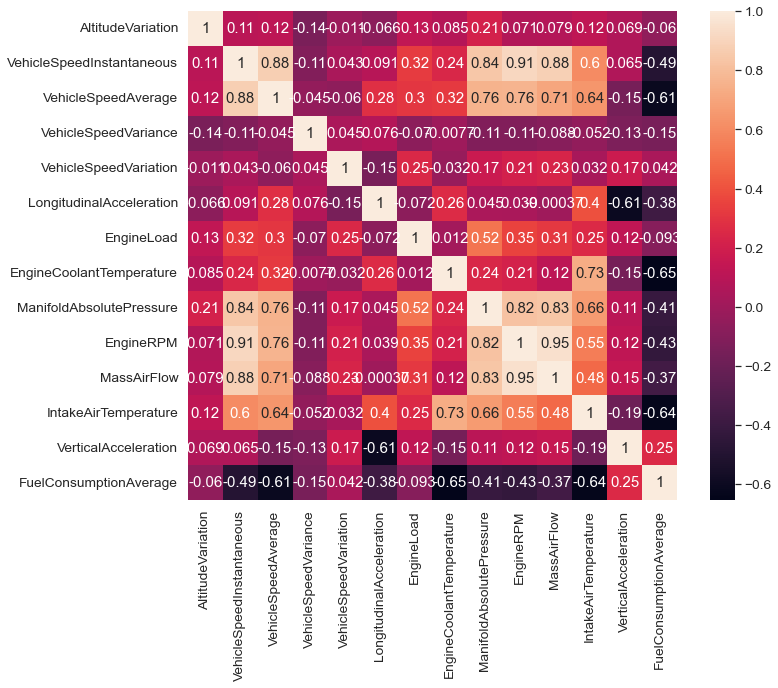

In [246]:
corr_map(df_peugeot)

<AxesSubplot:>

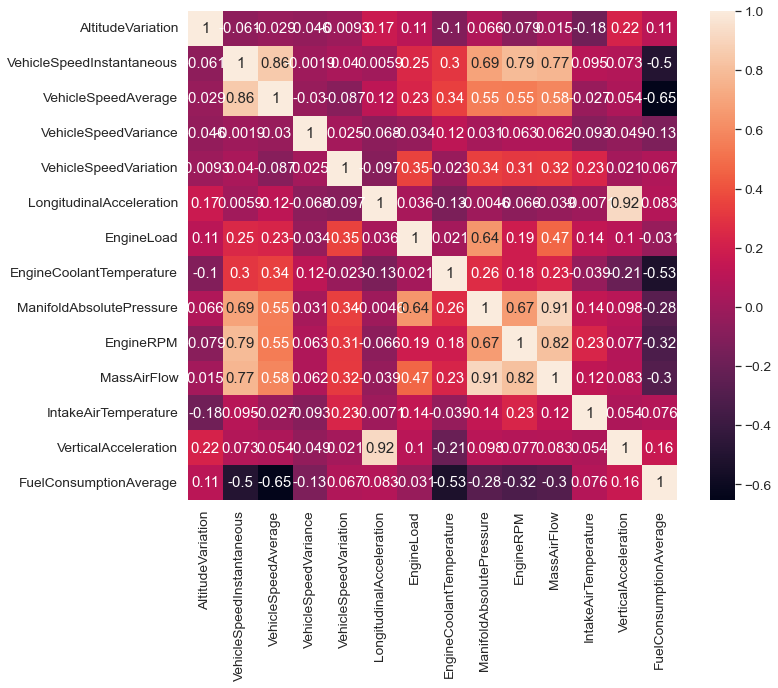

In [247]:
corr_map(df_corsa)

In [322]:
## Saving the outputs from the VIF function for each Peugeot dataset
vif_colour_peugeot, vif_peugeot = variance_inflation_factor(df_peugeot)
vif_colour_peugeot_minmax, vif_peugeot_minmax = variance_inflation_factor(df_peugeot_minmax)
vif_colour_peugeot_std, vif_peugeot_std = variance_inflation_factor(df_peugeot_std)

In [323]:
vif_colour_peugeot

In [324]:
vif_colour_peugeot_minmax

In [325]:
vif_colour_peugeot_std

In [326]:
## Saving the outputs from the VIF function for each Peugeot dataset
vif_colour_corsa, vif_corsa = variance_inflation_factor(df_corsa)
vif_colour_corsa_minmax, vif_corsa_minmax = variance_inflation_factor(df_corsa_minmax)
vif_colour_corsa_std, vif_corsa_std = variance_inflation_factor(df_corsa_std)

In [327]:
vif_colour_corsa

In [328]:
vif_colour_corsa_minmax

In [329]:
vif_colour_corsa_std

In [253]:
## Defining the VIF function to drop the feature if the variance is greater than 10%
def vif_drop(df,vif):
    vif = vif[vif['vif_Factor'] >=10]
    cols = [x for x in vif.features]
    df = df.drop(columns=cols)
    return df

In [254]:
## Applying this function to all the Peugeot datasets
df_peugeot = vif_drop(df_peugeot,vif_peugeot)
df_peugeot_minmax = vif_drop(df_peugeot_minmax,vif_peugeot_minmax)
df_peugeot_std = vif_drop(df_peugeot_std,vif_peugeot_std)

In [255]:
df_peugeot.head()

AltitudeVariation  VehicleSpeedVariance  VehicleSpeedVariation  \
0         -13.399994            115.840061              -4.500000   
1         -13.200005            117.200816              -3.599998   
2         -13.200005            117.559595              -2.700001   
3         -11.800003            117.801222               0.000000   
4         -19.800003            117.925697               0.000000   

   LongitudinalAcceleration  EngineLoad  VerticalAcceleration  
0                    1.0548   38.039215               -0.5982  
1                    0.9012   38.039215               -0.5244  
2                    0.9331   90.588234               -0.5068  
3                    0.9878   90.588234               -0.4882  
4                    1.1316   92.941177               -0.6712

In [256]:
df_peugeot_minmax.head()

VehicleSpeedVariance  EngineLoad  FuelConsumptionAverage
0              0.081671    0.380392                0.879400
1              0.082631    0.380392                0.815376
2              0.082884    0.905882                0.815376
3              0.083054    0.905882                0.795475
4              0.083142    0.929412                0.764429

In [257]:
df_peugeot_std.head()

AltitudeVariation  VehicleSpeedAverage  VehicleSpeedVariance  \
0          -6.281900            -1.062697             -0.211181   
1          -6.187627            -1.053357             -0.203235   
2          -6.187627            -1.045492             -0.201140   
3          -5.527679            -1.037626             -0.199729   
4          -9.298806            -1.029761             -0.199002   

   VehicleSpeedVariation  LongitudinalAcceleration  EngineLoad  \
0              -1.863633                  0.383174   -0.178623   
1              -1.490329                  0.224912   -0.178623   
2              -1.117025                  0.257780    1.632103   
3               0.002887                  0.314140    1.632103   
4               0.002887                  0.462305    1.713180   

   EngineCoolantTemperature  ManifoldAbsolutePressure  IntakeAirTemperature  \
0                 -1.935200                 -0.758497             -1.213904   
1                 -1.935200                 -0.758497             -1.213904   
2                 -1.879973                 -0.758497             -1.213904   
3                 -1.879973                 -0.758497             -1.213904   
4                 -1.879973                 -0.758497             -1.213904   

   VerticalAcceleration  FuelConsumptionAverage  
0             -0.188919                3.454913  
1             -0.076754                3.084356  
2             -0.050004                3.084356  
3             -0.021735                2.969176  
4             -0.299869                2.789487

In [258]:
## Applying this function to all the Peugeot datasets
df_corsa = vif_drop(df_corsa,vif_corsa)
df_corsa_minmax = vif_drop(df_corsa_minmax,vif_corsa_minmax)
df_corsa_std = vif_drop(df_corsa_std,vif_corsa_std)

In [259]:
df_corsa.head()

AltitudeVariation  VehicleSpeedVariance  VehicleSpeedVariation  EngineLoad
0          -2.299988            121.592690              -2.476980    4.705883
1          -2.099976            120.422571              -1.576260   10.588236
2          -1.500000            118.456769              -1.351080   27.450981
3           0.100037            117.571308              -0.450359   24.313726
4           0.099976            117.074149               1.351080   20.000000

In [260]:
df_corsa_minmax.head()

VehicleSpeedVariance  EngineLoad  IntakeAirTemperature  \
0              0.115605    0.047059              0.629630   
1              0.114493    0.105882              0.555556   
2              0.112624    0.274510              0.518519   
3              0.111782    0.243137              0.481481   
4              0.111309    0.200000              0.518519   

   FuelConsumptionAverage  
0                0.321173  
1                0.321656  
2                0.319713  
3                0.318321  
4                0.316032

In [261]:
df_corsa_std.head()

AltitudeVariation  VehicleSpeedAverage  VehicleSpeedVariance  \
0          -0.894512            -0.815183             -0.379197   
1          -0.796278            -0.802140             -0.385274   
2          -0.501606            -0.789827             -0.395482   
3           0.284235            -0.785430             -0.400080   
4           0.284205            -0.780473             -0.402662   

   VehicleSpeedVariation  EngineLoad  EngineCoolantTemperature  \
0              -1.052290   -1.155008                 -0.836273   
1              -0.666061   -0.880284                 -0.836273   
2              -0.569504   -0.092744                 -0.836273   
3              -0.183276   -0.239263                 -0.734948   
4               0.589180   -0.440727                 -0.734948   

   ManifoldAbsolutePressure  EngineRPM  IntakeAirTemperature  \
0                 -0.516322   0.346857              1.678050   
1                 -0.635446   0.156440              1.201476   
2                 -0.635446  -0.003725              0.963189   
3                 -0.595738   0.033647              0.724902   
4                 -0.595738   0.190252              0.963189   

   FuelConsumptionAverage  
0                0.656885  
1                0.660509  
2                0.645932  
3                0.635486  
4                0.618312

# PCA

In [262]:
## Declaring the PCA 2D analysis and plotting 
def pca_plot_2d(X,y,col_name,df):    
    from sklearn.decomposition import PCA

    pca = PCA(n_components=3)

    X = StandardScaler().fit_transform(X)

    principalComponents = pca.fit_transform(X)

    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2','principal component 3'])

    principalDf = principalDf.reset_index(drop=True)

    target = pd.DataFrame(df[col_name])

    target = target.reset_index(drop=True)

    targets = list(target[col_name].unique())

    finalDf = pd.concat([principalDf,df[[col_name]]],axis=1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 Component PCA'+' ' +x, fontsize = 20)

    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[col_name] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    return ax.grid(),finalDf

## Declaring the PCA 3D analysis and plotting 
def pca_plot_3D(X,y,col_name,df):   
    from sklearn.decomposition import PCA

    pca = PCA(n_components=3)

    X = StandardScaler().fit_transform(X)

    principalComponents = pca.fit_transform(X)

    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2','principal component 3'])

    principalDf = principalDf.reset_index(drop=True)

    target = pd.DataFrame(df[col_name])

    target = target.reset_index(drop=True)

    targets = list(target[col_name].unique())

    finalDf = pd.concat([principalDf,df[[col_name]]],axis=1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection='3d') 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_zlabel('Principal Component 3', fontsize = 15)
    ax.set_title('3 Component PCA'+' ' +x, fontsize = 20)

    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[col_name] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , finalDf.loc[indicesToKeep, 'principal component 3']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    return ax.grid()

# Classifier Models

In [330]:
## Inviting the models to the party
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

## Logistic Regression

In [271]:
## Defining the Logistical Regression Model
def logistic_model(X,y):    
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.33)

    model = LogisticRegression()

    model.fit(X_train,y_train)

    return model.score(X_test,y_test)

## Random Forest

In [272]:
## Defining the Random Forest Classifier
def random_forest(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.33)
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=1000,
    max_depth=3, min_samples_leaf=10)
    model.fit(X_train , y_train)
    return model.score(X_test , y_test)

# PCA & Classifier Models

In this section, the PCA analysis and model preditions are combined to plot the 2D & 3D PCA variables which are then used in each classifier to produce Model Scores for each model and each dataset.

## Peugeot Not Scaled 

roadSurface Logistical Model Score: 0.7320700407771648
traffic Logistical Model Score: 0.61765411369633
drivingStyle Logistical Model Score: 0.9443511633485249
roadSurface Random Forest Score: 0.7908371312065243
traffic Random Forest Score: 0.6548332933557208
drivingStyle Random Forest Score: 0.9445910290237467


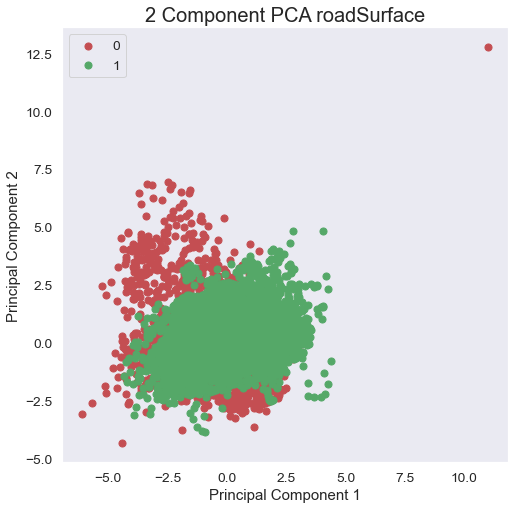

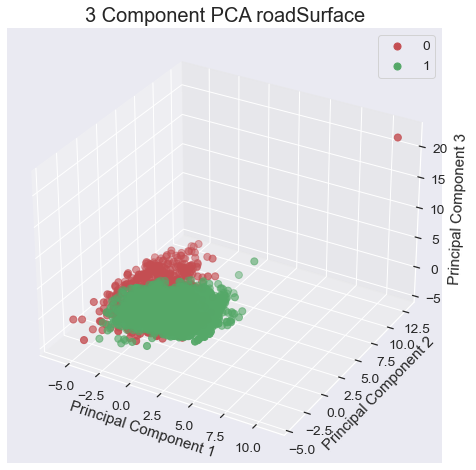

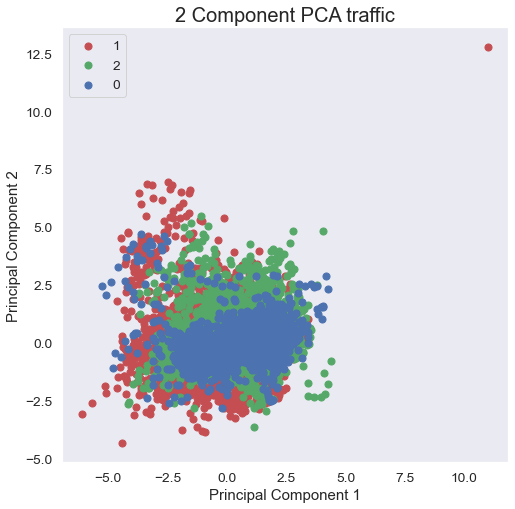

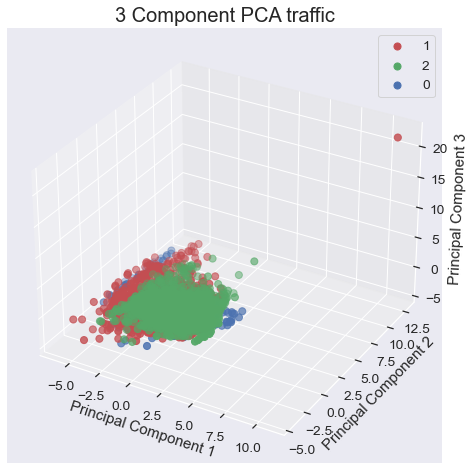

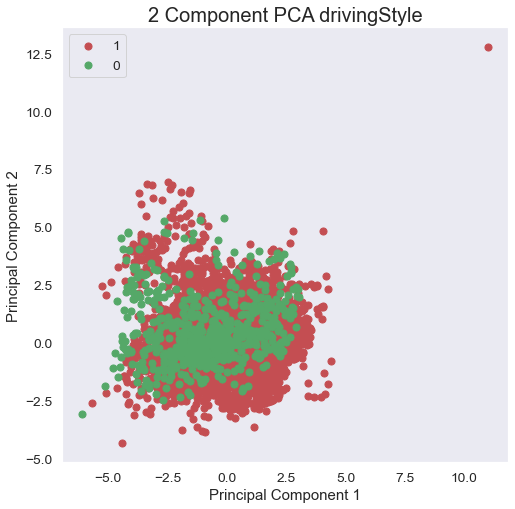

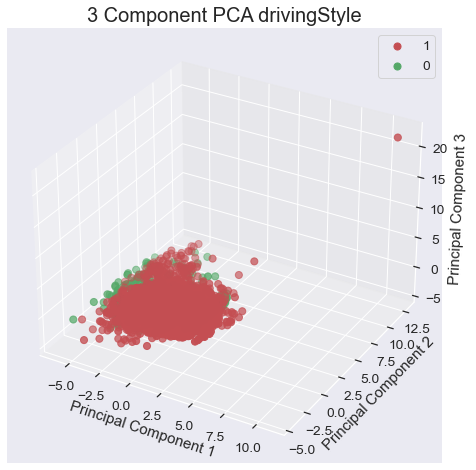

In [276]:
X = df_peugeot
df = list()
for x in peugeot_y.columns:
    z = peugeot_y[x]
    ax,finalDf = pca_plot_2d(X,z,x,peugeot_y)
    ax1 = pca_plot_3D(X,z,x,peugeot_y)
    df.append(finalDf)
    ax
    ax1
for i in range(0,len(df)):
    cols = df[i].columns  
    X = df[i].select_dtypes(float)
    y = np.array(df[i].select_dtypes(int))
    y=y.flatten()
    print(cols[-1],'Logistical Model Score:',logistic_model(X,y))
for i in range(0,len(df)):
    cols = df[i].columns  
    X = df[i].select_dtypes(float)
    y = np.array(df[i].select_dtypes(int))
    y=y.flatten()
    print(cols[-1],'Random Forest Score:',random_forest(X,y))

## Peugeot Min-Max

roadSurface Logistical Model Score: 0.8258575197889182
traffic Logistical Model Score: 0.6728232189973615
drivingStyle Logistical Model Score: 0.9424322379467498
roadSurface Random Forest Score: 0.8472055648836652
traffic Random Forest Score: 0.6812185176301271
drivingStyle Random Forest Score: 0.9445910290237467


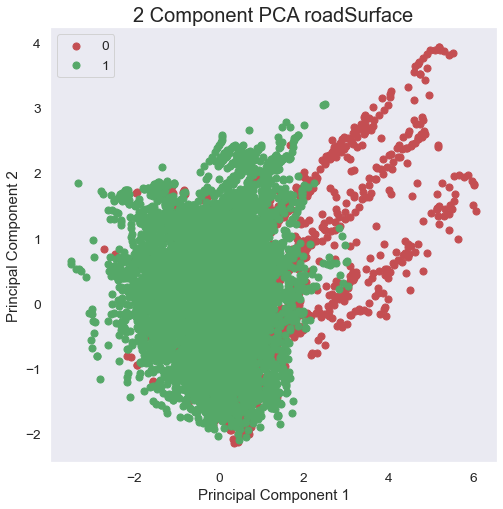

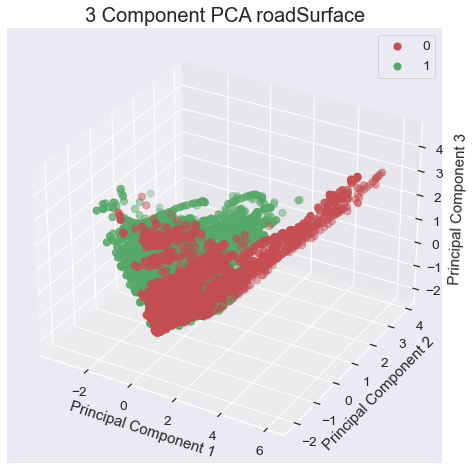

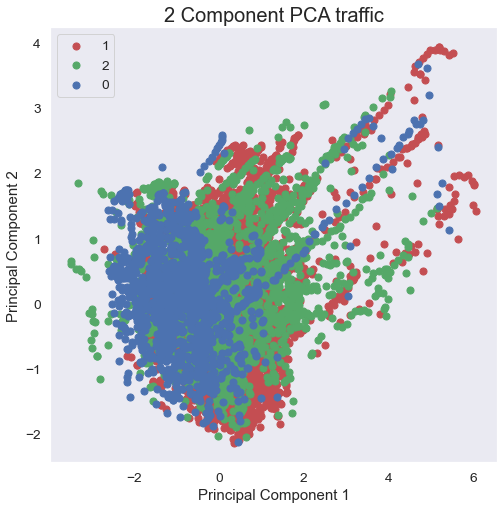

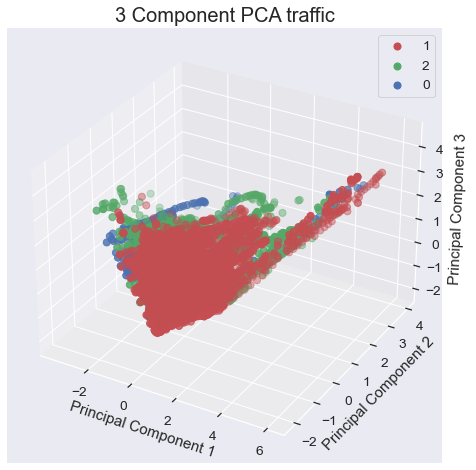

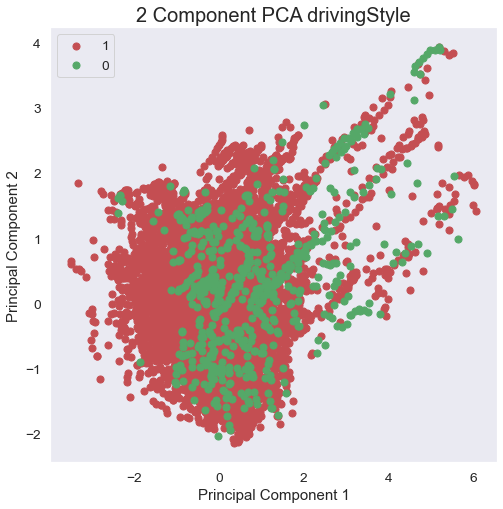

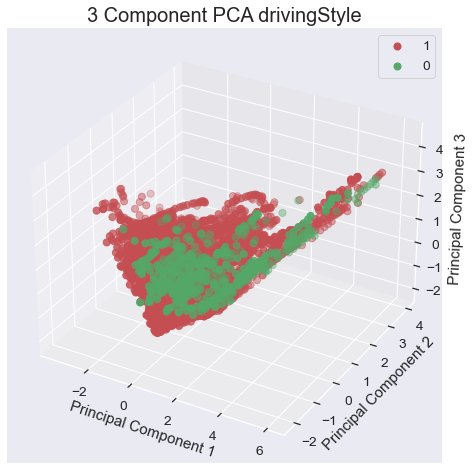

In [277]:
X = df_peugeot_minmax
df = list()

for x in peugeot_y.columns:
    z = peugeot_y[x]
    ax,finalDf = pca_plot_2d(X,z,x,peugeot_y)
    ax1 = pca_plot_3D(X,z,x,peugeot_y)
    df.append(finalDf)
    ax
    ax1
    
for i in range(0,len(df)):
    cols = df[i].columns  
    X = df[i].select_dtypes(float)
    y = np.array(df[i].select_dtypes(int))
    y=y.flatten()
    print(cols[-1],'Logistical Model Score:',logistic_model(X,y))
for i in range(0,len(df)):
    cols = df[i].columns  
    X = df[i].select_dtypes(float)
    y = np.array(df[i].select_dtypes(int))
    y=y.flatten()
    print(cols[-1],'Random Forest Score:',random_forest(X,y))

## Peugeot Standard Scaling

roadSurface Logistical Model Score: 0.9069321180139122
traffic Logistical Model Score: 0.6761813384504677
drivingStyle Logistical Model Score: 0.9443511633485249
roadSurface Random Forest Score: 0.9086111777404653
traffic Random Forest Score: 0.6915327416646678
drivingStyle Random Forest Score: 0.9457903573998561


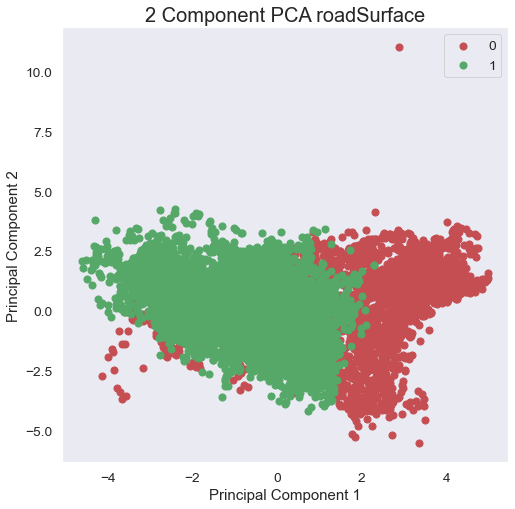

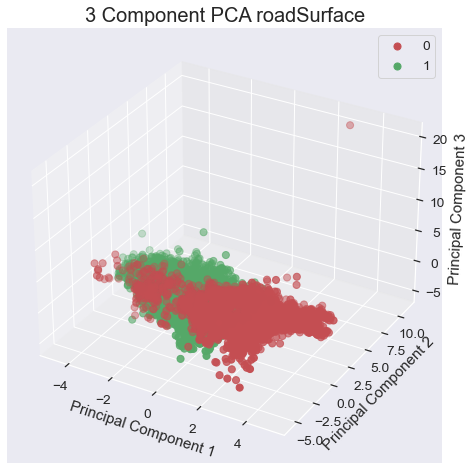

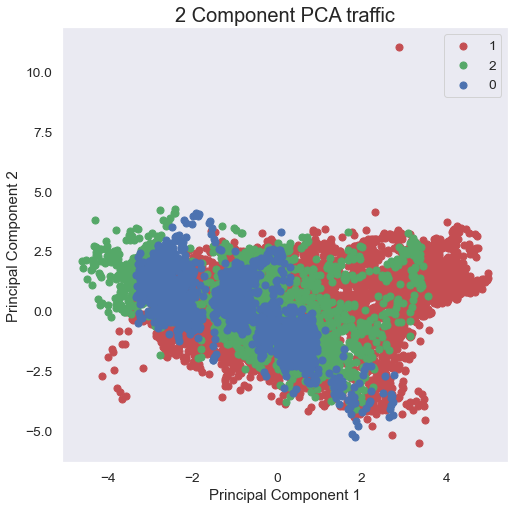

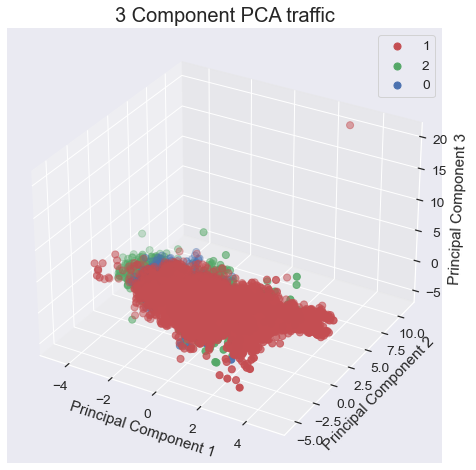

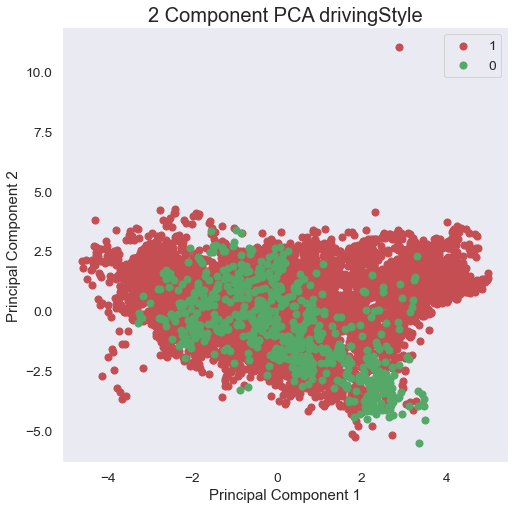

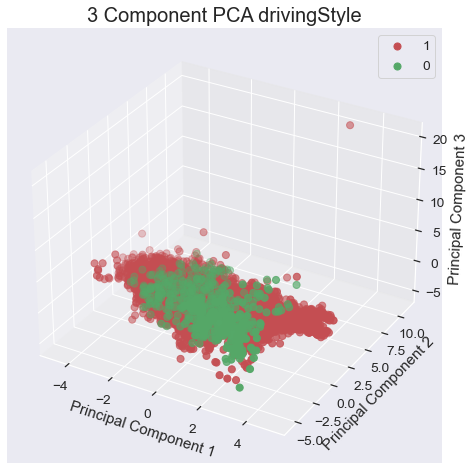

In [278]:
X = df_peugeot_std
df = list()
for x in peugeot_y.columns:
    z = peugeot_y[x]
    ax,finalDf = pca_plot_2d(X,z,x,peugeot_y)
    ax1 = pca_plot_3D(X,z,x,peugeot_y)
    df.append(finalDf)
    ax
    ax1
for i in range(0,len(df)):
    cols = df[i].columns  
    X = df[i].select_dtypes(float)
    y = np.array(df[i].select_dtypes(int))
    y=y.flatten()
    print(cols[-1],'Logistical Model Score:',logistic_model(X,y))
for i in range(0,len(df)):
    cols = df[i].columns  
    X = df[i].select_dtypes(float)
    y = np.array(df[i].select_dtypes(int))
    y=y.flatten()
    print(cols[-1],'Random Forest Score:',random_forest(X,y))

## Corsa Not Scaled

roadSurface Logistical Model Score: 0.9635175605771849
traffic Logistical Model Score: 0.9000816771031854
drivingStyle Logistical Model Score: 0.8205826300027226
roadSurface Random Forest Score: 0.9635175605771849
traffic Random Forest Score: 0.9000816771031854
drivingStyle Random Forest Score: 0.8205826300027226


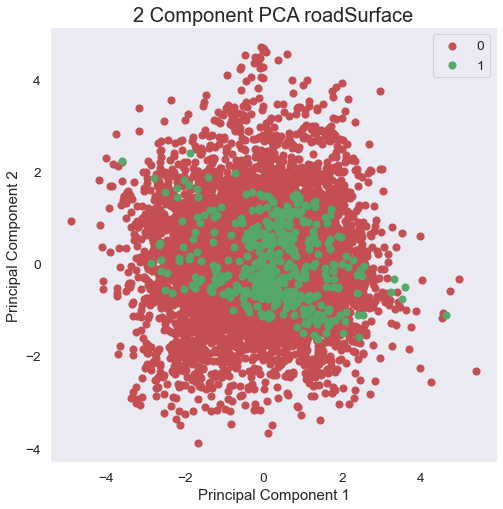

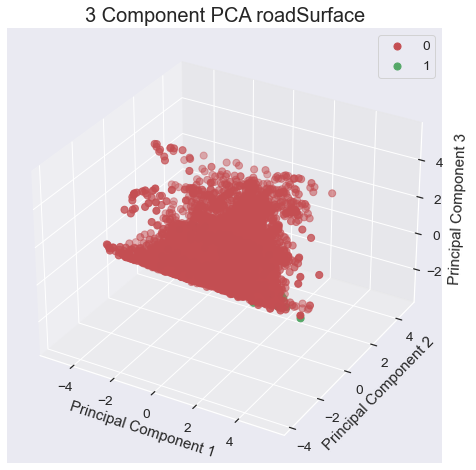

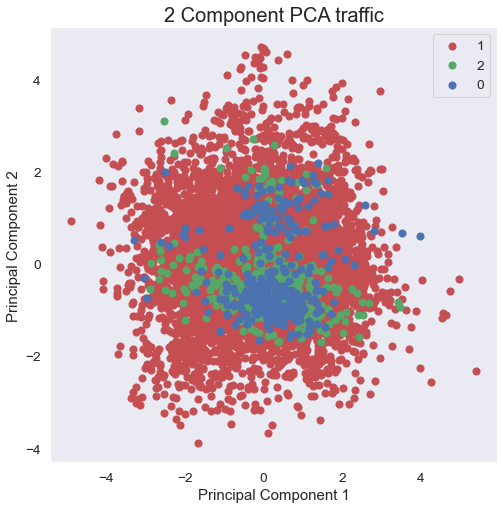

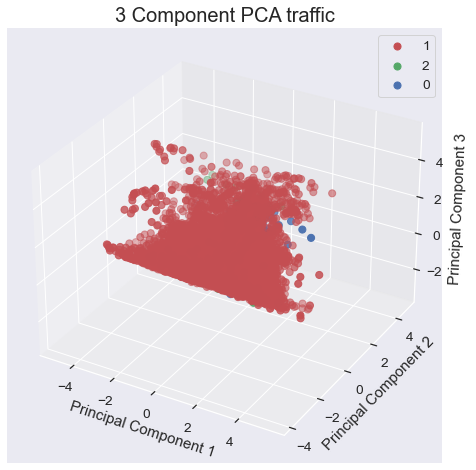

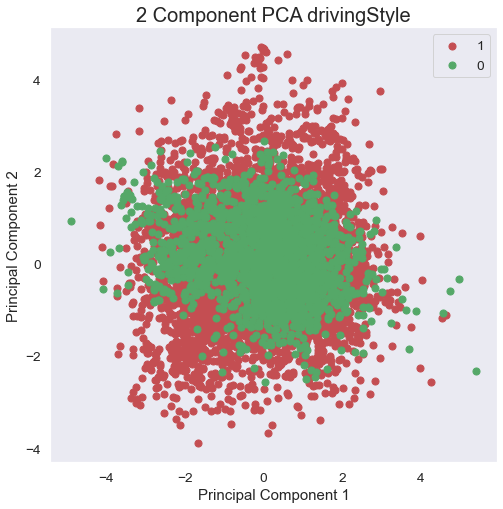

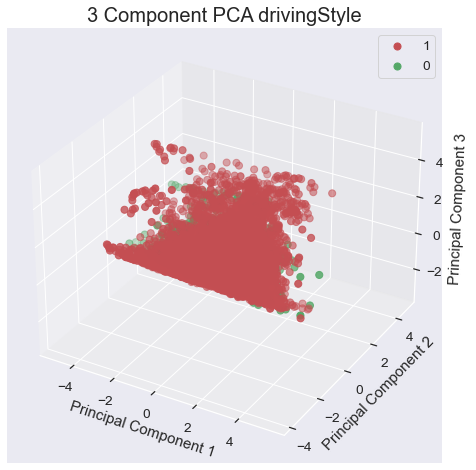

In [279]:
X = df_corsa
df = list()
for x in corsa_y.columns:
    z = peugeot_y[x]
    ax,finalDf = pca_plot_2d(X,z,x,corsa_y)
    ax1 = pca_plot_3D(X,z,x,corsa_y)
    df.append(finalDf)
    ax
    ax1
for i in range(0,len(df)):
    cols = df[i].columns  
    X = df[i].select_dtypes(float)
    y = np.array(df[i].select_dtypes(int))
    y=y.flatten()
    print(cols[-1],'Logistical Model Score:',logistic_model(X,y))
for i in range(0,len(df)):
    cols = df[i].columns  
    X = df[i].select_dtypes(float)
    y = np.array(df[i].select_dtypes(int))
    y=y.flatten()
    print(cols[-1],'Random Forest Score:',random_forest(X,y))

## Corsa Min-Max

roadSurface Logistical Model Score: 0.9635175605771849
traffic Logistical Model Score: 0.8995371630819493
drivingStyle Logistical Model Score: 0.8205826300027226
roadSurface Random Forest Score: 0.9635175605771849
traffic Random Forest Score: 0.9000816771031854
drivingStyle Random Forest Score: 0.8205826300027226


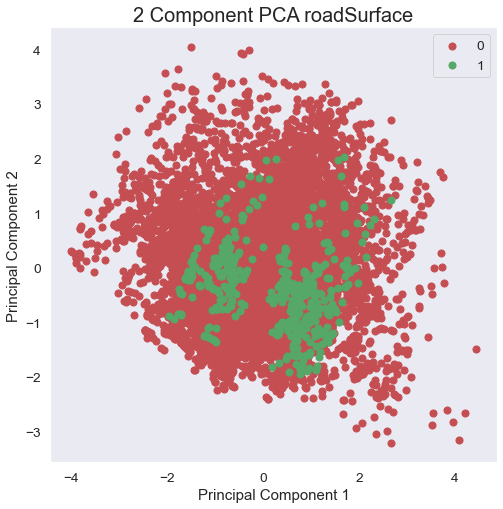

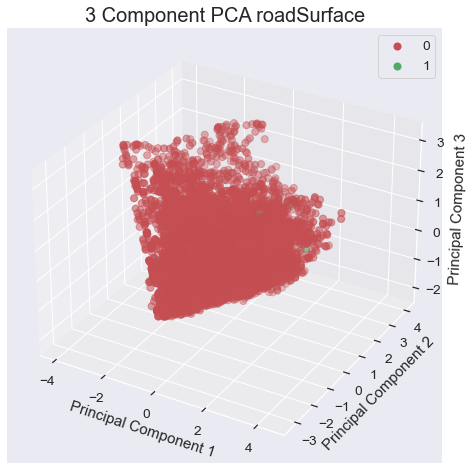

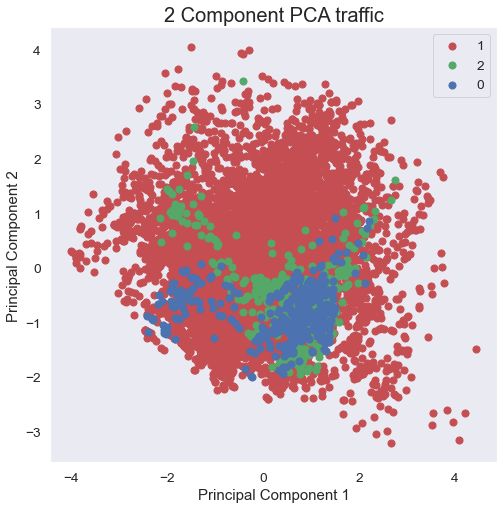

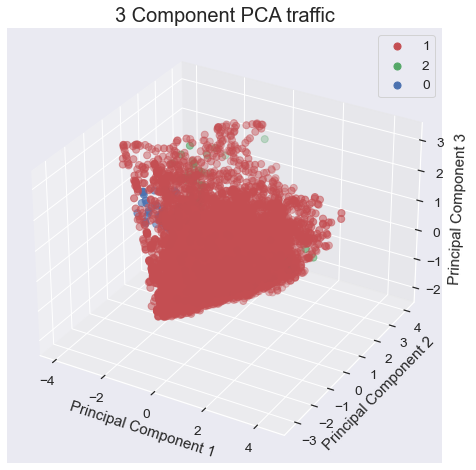

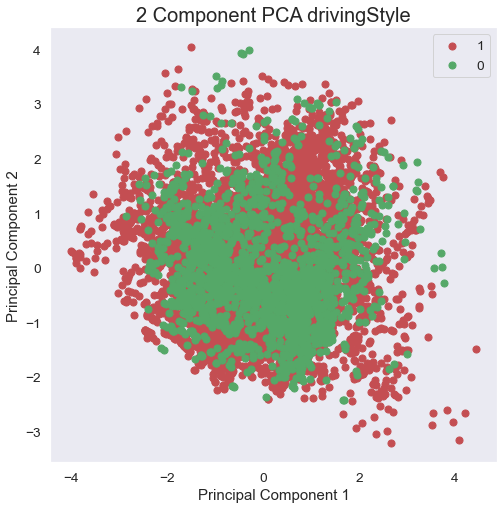

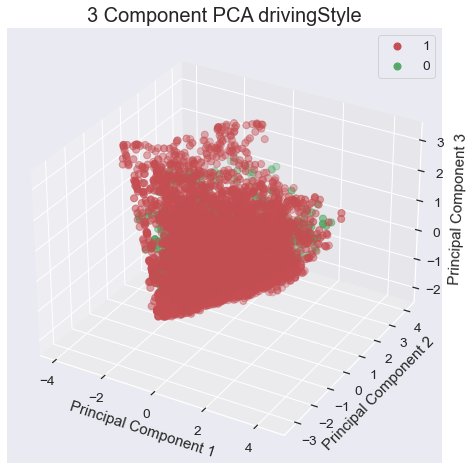

In [280]:
X = df_corsa_minmax
df = list()
for x in corsa_y.columns:
    z = peugeot_y[x]
    ax,finalDf = pca_plot_2d(X,z,x,corsa_y)
    ax1 = pca_plot_3D(X,z,x,corsa_y)
    df.append(finalDf)
    ax
    ax1
    
for i in range(0,len(df)):
    cols = df[i].columns  
    X = df[i].select_dtypes(float)
    y = np.array(df[i].select_dtypes(int))
    y=y.flatten()
    print(cols[-1],'Logistical Model Score:',logistic_model(X,y))
for i in range(0,len(df)):
    cols = df[i].columns  
    X = df[i].select_dtypes(float)
    y = np.array(df[i].select_dtypes(int))
    y=y.flatten()
    print(cols[-1],'Random Forest Score:',random_forest(X,y))

## Corsa Standard Scaling

roadSurface Logistical Model Score: 0.9635175605771849
traffic Logistical Model Score: 0.895725564933297
drivingStyle Logistical Model Score: 0.8205826300027226
roadSurface Random Forest Score: 0.9635175605771849
traffic Random Forest Score: 0.9000816771031854
drivingStyle Random Forest Score: 0.8205826300027226


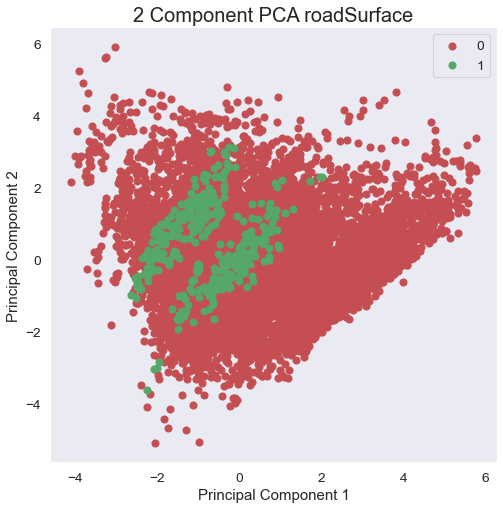

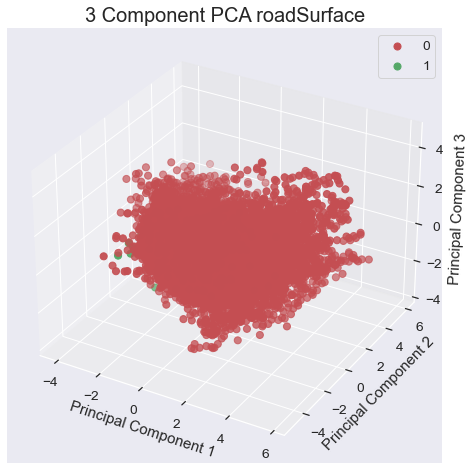

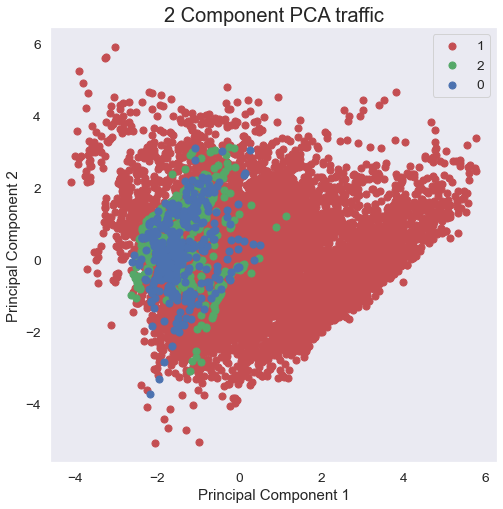

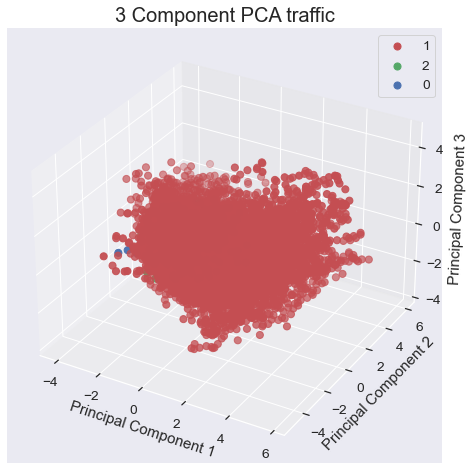

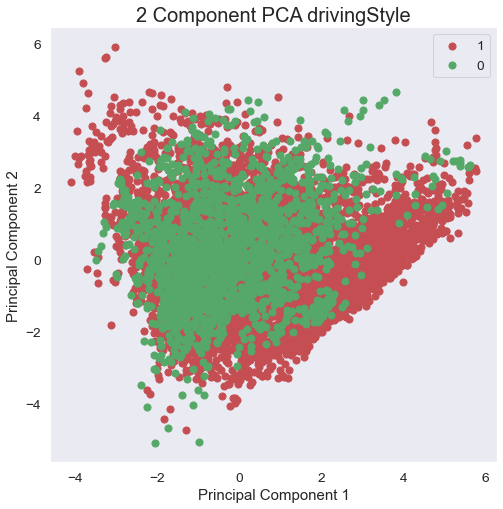

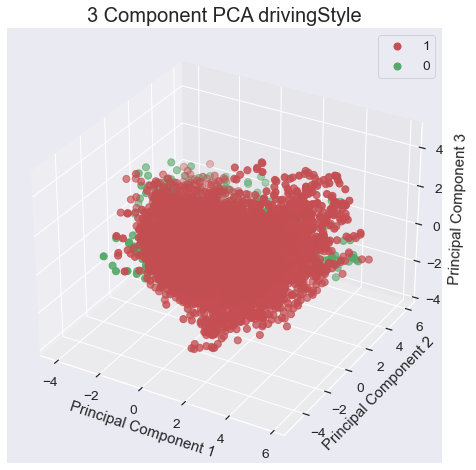

In [281]:
X = df_corsa_std
df = list()
for x in corsa_y.columns:
    z = peugeot_y[x]
    ax,finalDf = pca_plot_2d(X,z,x,corsa_y)
    ax1 = pca_plot_3D(X,z,x,corsa_y)
    df.append(finalDf)
    ax
    ax1
for i in range(0,len(df)):
    cols = df[i].columns  
    X = df[i].select_dtypes(float)
    y = np.array(df[i].select_dtypes(int))
    y=y.flatten()
    print(cols[-1],'Logistical Model Score:',logistic_model(X,y))
for i in range(0,len(df)):
    cols = df[i].columns  
    X = df[i].select_dtypes(float)
    y = np.array(df[i].select_dtypes(int))
    y=y.flatten()
    print(cols[-1],'Random Forest Score:',random_forest(X,y))